# Problem E.  
### Input: A graph G

Find: a fractal dimension of G. It is defined by an optimal partition of a graph into cliques in such a way that every edge is covered by some clique from the partition. For a given partition, we color the cliques in such a way that intersecting cliques have different colors; the number of colors is the chromatic number of the partition. The goal is to find a partition with the minimal chromatic number; this number divided by the number of vertices is a fractal dimension of a graph.
<br/><br/>
Example:
<img src="question_example.png" width="800" />

In [1]:
import networkx as nx
import itertools
G = nx.Graph()
G.add_nodes_from([1,2,3,4,5,6,7,8])
G.add_edges_from([(1,2),(2,3), (2,4), (3,4), (3,5), (4,5), (5,6), (5,7), (6,8), (7,8)])

In [2]:
number_edges = G.number_of_edges()

In [3]:
number_edges

10

In [4]:
number_nodes = G.number_of_nodes()

In [5]:
number_nodes

8

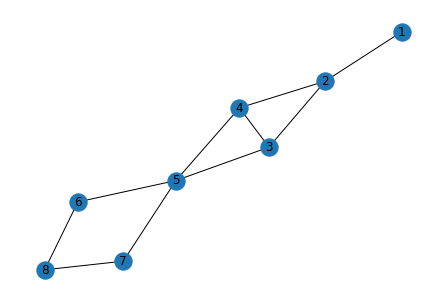

In [6]:
nx.draw_spring(G, with_labels = True)

In [7]:
cliques = []
for clique in nx.find_cliques(G):
    cliques.append(tuple(clique))

In [8]:
cliques

[(8, 6), (8, 7), (1, 2), (2, 3, 4), (5, 3, 4), (5, 6), (5, 7)]

In [14]:
G_prime = nx.Graph()

In [15]:
G_prime.add_nodes_from(cliques)

In [16]:
G_prime.number_of_nodes()

7

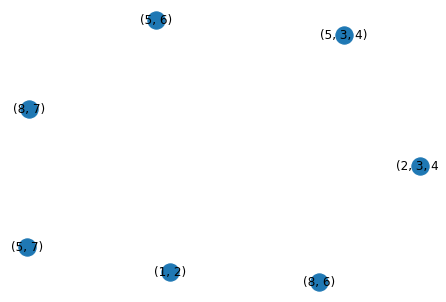

In [17]:
nx.draw_spring(G_prime, with_labels = True)

In [18]:
nodes_prime = list(G_prime.nodes)

In [19]:
n = len(nodes_prime)
for i in range(n-1):
    for j in range(i+1, n):
        if(set(nodes_prime[i]) & set(nodes_prime[j])):
            G_prime.add_edge(nodes_prime[i], nodes_prime[j])

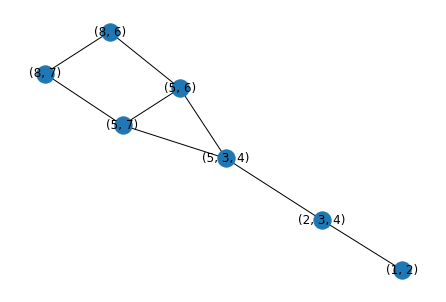

In [20]:
nx.draw_spring(G_prime, with_labels = True)

In [21]:
colors = nx.coloring.greedy_color(G_prime, strategy='DSATUR')

In [22]:
#get the number of colors used
colors = len(set(colors.values()))

In [23]:
fractal_dimension = colors/number_nodes

In [24]:
print("The Fractal dimension of this graph is", fractal_dimension)

The Fractal dimension of this graph is 0.375


In [25]:
if (3/8) == fractal_dimension:
    print("Your answer is matching with your output")

Your answer is matching with your output
